# 참고 사이트 

link : https://dacon.io/en/codeshare/4532

In [ ]:
import torch
from torchvision import transforms, datasets, utils 
# transforms : 이미지 데이터셋에 쓸 수 있는 여러 변환 필터를 담은 모듈. 크기조절, 밝기, 타입변환 등등 전처리 수행
# datasets : load dataset
# utils:: 아마자 저장 및 시각화 도구

from torch.utils import data
# torch.utils.data : 데이터셋 표준 정의? 데이터셋 다루는 도구

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([transforms.ToTensor()]) # image -> torch.tensor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataset 은 편하게 데이터를 가져오게 해주는 도구
# transform은 데이터전처리 역할

trainset = datasets.FashionMNIST(
    root='./drive/MyDrive/data/',
    train=True,
    download=True,
    transform = transform
)

testset = datasets.FashionMNIST(
    root='./drive/MyDrive/data/',
    train=False,
    download=True,
    transform=transform
)

In [ ]:
batch_size = 16

# data loader는 데이터셋을 다루는 도구
train_loader = data.DataLoader(
    dataset = trainset,
    batch_size = batch_size,
    shuffle = True
)

test_loader = data.DataLoader(
    dataset = testset,
    batch_size = batch_size,
    shuffle = True
)

In [ ]:
trainset.classes[0]

'T-shirt/top'

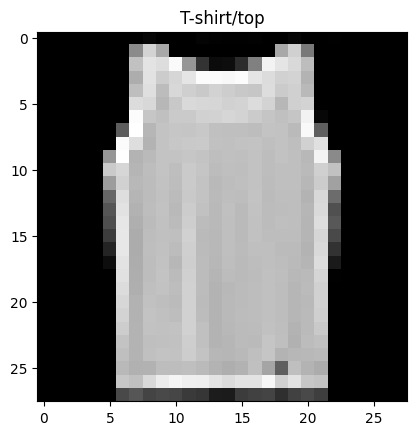

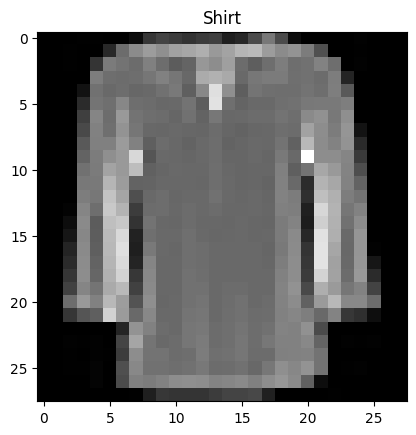

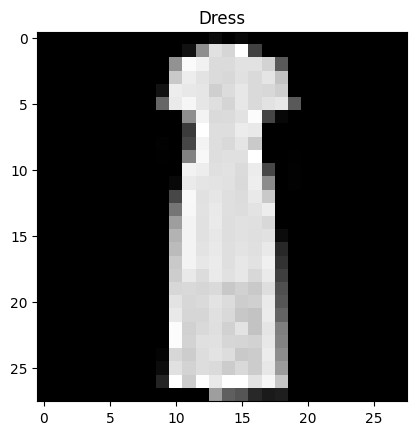

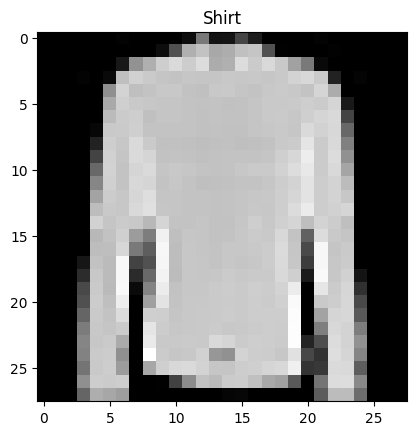

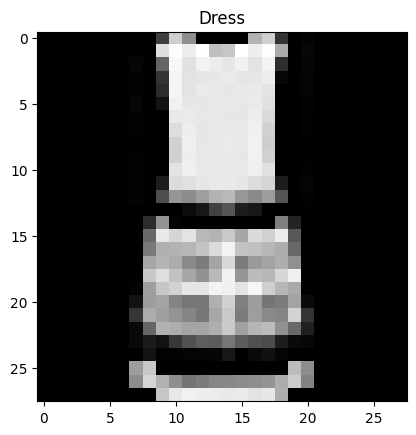

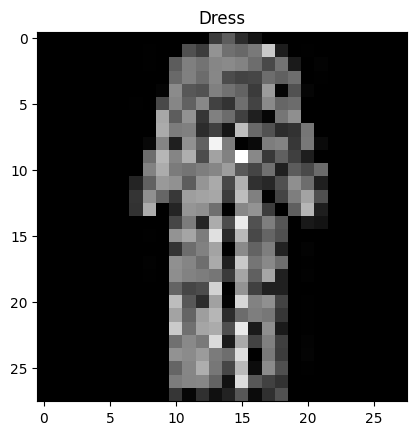

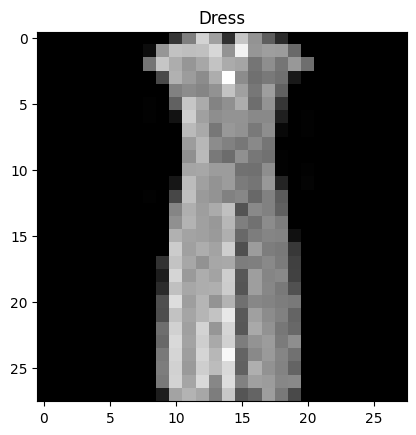

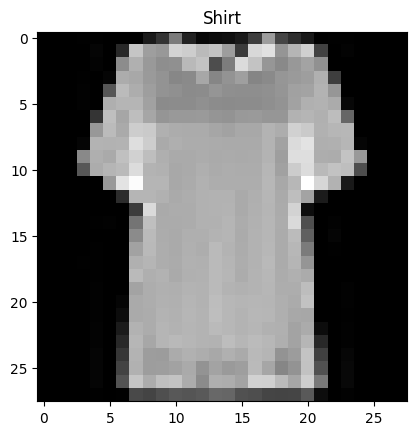

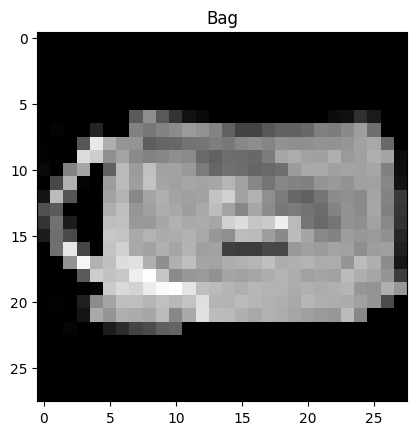

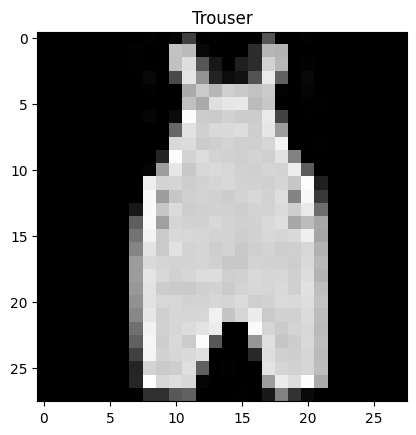

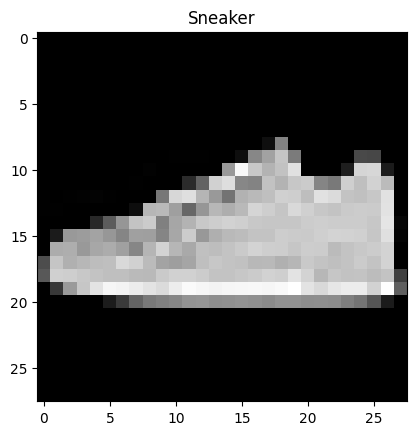

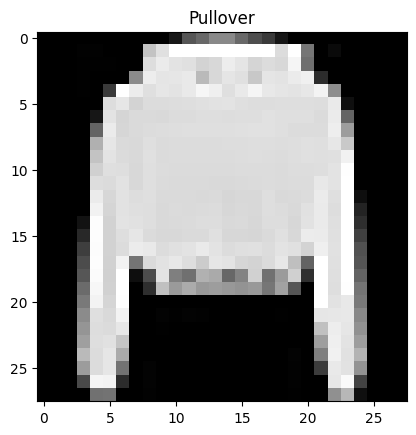

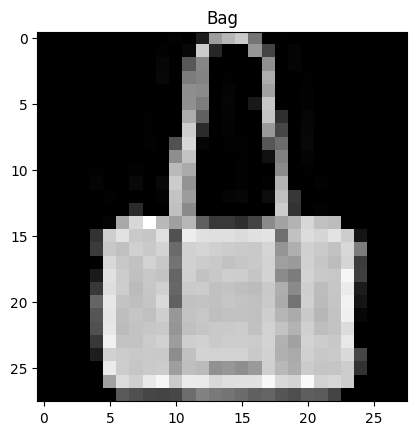

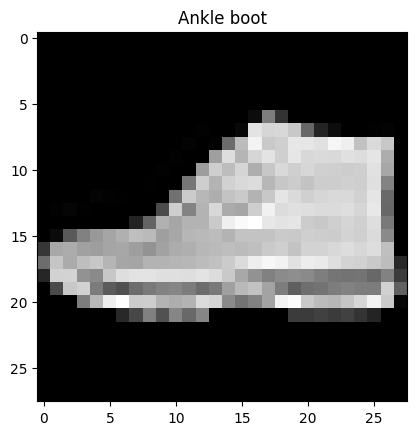

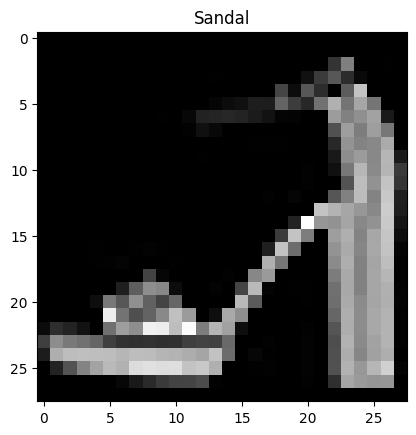

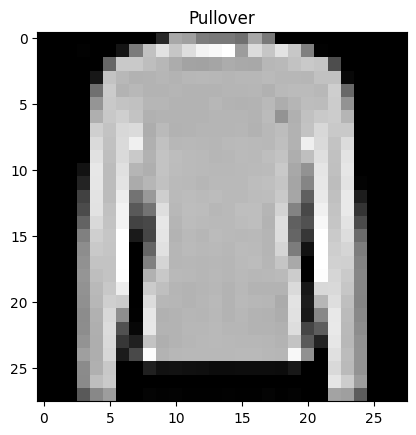

In [ ]:
dataiter = iter(train_loader) # 배치를 iterator로 만들기
images, labels = next(dataiter) # 배치 1개 뽑기

# 한 배치에 들어있는 이미지와 정답을 같이 출력해주는 함수
def show_image(dataset:datasets, images:torch.tensor, labels:torch.tensor)->None:
    for i in range(len(images)):
        plt.figure()
        plt.title(dataset.classes[labels[i].item()])
        plt.imshow(images[i].squeeze(), cmap='gray') # gray로 안하면 노랑덜룩으로 나와서 바꾸는게 편함

show_image(trainset, images, labels)

In [ ]:
images.shape

torch.Size([16, 1, 28, 28])

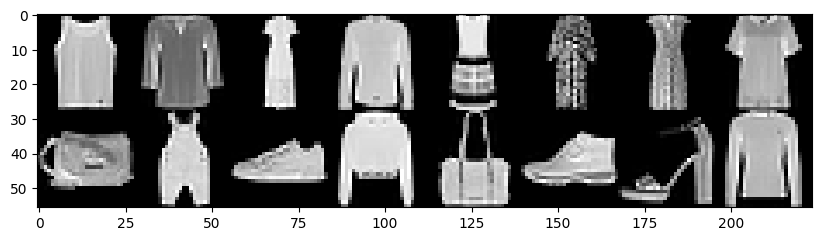

In [ ]:
# 여러 이미지 모아 보기
img = utils.make_grid(images, padding=0) # 개x채x행x렬 꼴의 텐서를 입력
npimg = img.numpy() # matplotlib 와 numpy가 호환 가능(텐서는 안되는듯)
plt.figure(figsize=(10,7))
plt.imshow(np.transpose(npimg, (1,2,0))) # 원래 양식이 (채,행,렬)이므로 (행,렬,채)로 변경
# torch.transpose도 있지만, plt가 numpy와 호환이 되기에 np.transpose를 쓴걸로 예상됨
plt.show()

In [ ]:
print(labels)
print(labels[0])
print(type(labels[0]))

tensor([0, 6, 3, 6, 3, 3, 3, 6, 8, 1, 7, 2, 8, 9, 5, 2])
tensor(0)
<class 'torch.Tensor'>


In [ ]:
trainset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
CLASSES = {y:x for x,y in trainset.class_to_idx.items()}
print(CLASSES)

for label in labels:
    idx = label.item() # labels가 tensor이고 label도 tensor
    print(CLASSES[idx])

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
T-shirt/top
Shirt
Dress
Shirt
Dress
Dress
Dress
Shirt
Bag
Trouser
Sneaker
Pullover
Bag
Ankle boot
Sandal
Pullover


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu') # spellnig이 틀리지 않았나 확인
print(DEVICE)

cuda


In [ ]:
EPOCHS = 30
BATCH_SIZE = 64

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(
            nn.Linear(28*28, 16*16),
            nn.ReLU(),
            nn.Linear(16*16, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.linear(x)
        return x

In [ ]:
lr = 0.01

In [ ]:
model = Net().to(DEVICE) # GPU를 사용할 경우만 필요. CPU는 안써도됨.
optimizer = optim.Adam(model.parameters(), lr=0.01)

TypeError: ignored